# 7. Population charts

Population charts are a new addition to Multiplex that help you display data visually with one point per population item.
These kind of visualizations can be helpful in many scenarios, such as displaying the population of countries to breaking down a population into different groups.

As usual, Multiplex gives you the possibility of customizing these visualizations to your heart's content, allowing you tell different stories with the same type of visualization.
We'll explore these options in this notebook.
We will go through some examples that show you how you can use population charts in your projects.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

In [2]:
# load the data
df = pd.read_csv('data/2016-olympics-medals.csv')
df = df.set_index('Country')
df['Total'] = df.Gold + df.Silver + df.Bronze
df = df.sort_values(by='Total', ascending=False)
df

,Gold,Silver,Bronze,Total
Country,,,,
United States,46,37,38,121
China,26,18,26,70
Great Britain,27,23,17,67
Russian Federation,19,18,19,56
Germany,17,10,15,42
...,...,...,...,...
Qatar,0,1,0,1
Niger,0,1,0,1
Burundi,0,1,0,1


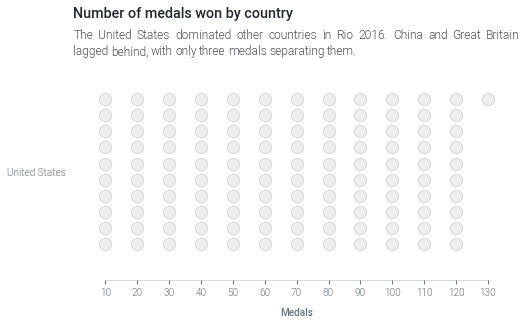

In [11]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# create a general style
style = { 's': 150, 'color': '#EDEDED', 'edgecolors': '#BDBDBD', 'linewidths': 0.5 }

# draw the visualization
viz = drawable.Drawable(plt.figure(figsize=(8, 4)))
for country in df.index[:1]:
    viz.draw_population(df.loc[country].Total, 10, country, height=0.8, **style)

# finalize the plot
viz.set_xlabel('Medals')
viz.set_title('Number of medals won by country', loc='left')
viz.set_caption("""The United States dominated other countries in Rio 2016.
                   China and Great Britain lagged behind, with only three medals separating them.""", align='justify')
viz.show()

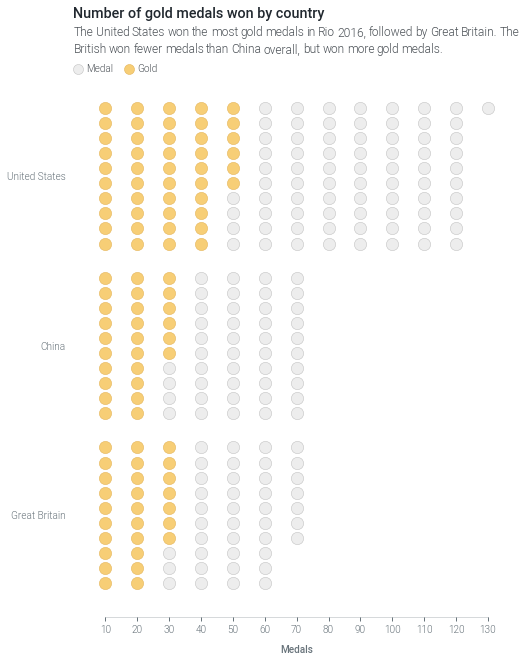

In [19]:
# create a specific style for each type of medal
gold = { 'color': '#F7CE76', 'edgecolors': '#E2B053', 'label': 'Gold' }
# silver = { 'color': '#DEDEDE', 'edgecolors': '#BDBDBD' }
# bronze = { 'color': '#FFBB81', 'edgecolors': '#E7A063' }
silver, bronze = { }, { }

# draw the visualization
viz = drawable.Drawable(plt.figure(figsize=(8, 10)))
for country in df.index[:3]:
    medals = [ gold ] * df.loc[country].Gold
    medals.extend([ silver ] * df.loc[country].Silver)
    medals.extend([ bronze ] * df.loc[country].Bronze)
    viz.draw_population(medals, 10, country, height=0.8, label='Medal', **style)

# finalize the plot
viz.set_xlabel('Medals')
viz.set_title('Number of gold medals won by country', loc='left')
viz.set_caption("""The United States won the most gold medals in Rio 2016, followed by Great Britain.
                   The British won fewer medals than China overall, but won more gold medals.""", align='justify')
viz.show()